In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
sales=pd.read_csv('Online_Sales.csv')

In [6]:
customer=pd.read_excel('CustomersData.xlsx')

In [7]:
coupen=pd.read_csv('Discount_Coupon.csv')

In [8]:
spend=pd.read_csv('Marketing_Spend.csv')

In [9]:
tax=pd.read_excel('Tax_amount.xlsx')

In [10]:
sales.shape,customer.shape,coupen.shape,spend.shape,tax.shape

((52924, 10), (1468, 4), (204, 4), (365, 3), (20, 2))

In [11]:
sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [12]:
sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [13]:
coupen.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [14]:
coupen.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [15]:
coupen.rename(columns={"Product_Category ": "Product_Category"},inplace=True)

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [17]:
sales['Transaction_Date']=pd.to_datetime(sales['Transaction_Date'],format='%Y%m%d')

In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [19]:
sales["Month_index"]=sales['Transaction_Date'].dt.month
sales["Month"]=sales['Transaction_Date'].dt.month_name()
sales["Week"]=sales['Transaction_Date'].dt.isocalendar().week


In [20]:
#sales['Month']=sales.Month.str.slice(start=0,stop=3)

In [21]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month_index,Month,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,1


In [22]:
join1=sales.merge(coupen,how='left',on=['Month','Product_Category'])

In [23]:
join1.shape

(52924, 15)

In [24]:
join1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_index', 'Month', 'Week',
       'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [25]:
customer.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object')

In [26]:
join2=join1.merge(customer,how='left',on='CustomerID')

In [27]:
join2.shape

(52924, 18)

In [28]:
join2.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_index', 'Month', 'Week',
       'Coupon_Code', 'Discount_pct', 'Gender', 'Location', 'Tenure_Months'],
      dtype='object')

In [29]:
spend.columns

Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

In [30]:
spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [31]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [32]:
spend["Date"]=pd.to_datetime(spend['Date'])

In [33]:
spend.head()

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [34]:
join3=join2.merge(spend,how='left',left_on='Transaction_Date',right_on='Date')

In [35]:
join3.shape

(52924, 21)

In [36]:
tax.columns

Index(['Product_Category', 'GST'], dtype='object')

In [37]:
df=join3.merge(tax,how='left',on='Product_Category')

In [38]:
df["Day Of Year"]=sales['Transaction_Date'].dt.dayofyear

In [39]:
df.shape

(52924, 23)

In [40]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,NaN,NaN,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,NaN,NaN,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,NaN,NaN,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,NaN,NaN,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,NaN,NaN,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1


In [41]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_index', 'Month', 'Week',
       'Coupon_Code', 'Discount_pct', 'Gender', 'Location', 'Tenure_Months',
       'Date', 'Offline_Spend', 'Online_Spend', 'GST', 'Day Of Year'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month_index          52924 non-null  int32         
 11  Month                52924 non-null  object        
 12  Week                 52924 non-null  UInt32        
 13  Coupon_Code          4516 non-n

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges 

In [44]:
df['Discount_pct']=np.where(df['Discount_pct'].isna(),0,df['Discount_pct'])
df['Sales']=df['Quantity']*df['Avg_Price']
df['Invoice Value']=np.where(df['Discount_pct']>0,((df['Sales'] )*(1-df['Discount_pct'])*(1+df['GST'])*(-1))+df['Delivery_Charges'],((df['Sales'] )*(1-df['Discount_pct'])*(1+df['GST']))+df['Delivery_Charges'])
#df['Invoice'] = (( df['Sales'])*(1-(df['Discount_pct']/100))*(1+df['GST']))+df['Delivery_Charges']

In [45]:
#df['Invoice Value']=(( df['Quantity']*df['Avg_Price'])*(1-df['Discount_pct'])*(1+df['GST']))+df['Delivery_Charges']

In [46]:
df.loc[(df['Discount_pct'].notna()),'Discount_pct']

#

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52919    0.0
52920    0.0
52921    0.0
52922    0.0
52923    0.0
Name: Discount_pct, Length: 52924, dtype: float64

In [47]:
df['Discount_pct'].value_counts()

Discount_pct
0.0     48408
20.0     4516
Name: count, dtype: int64

In [48]:
df.head()
#df=df.drop(columns='Invoice',axis=1)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year,Sales,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,153.71,175.581
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,153.71,175.581
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,2.05,8.755
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1,87.65,109.927
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1,16.50,25.970


## 2. Perform Detailed exploratory analysis


### Understanding how many customers acquired every month

Text(0.5, 1.0, 'Customer per Month')

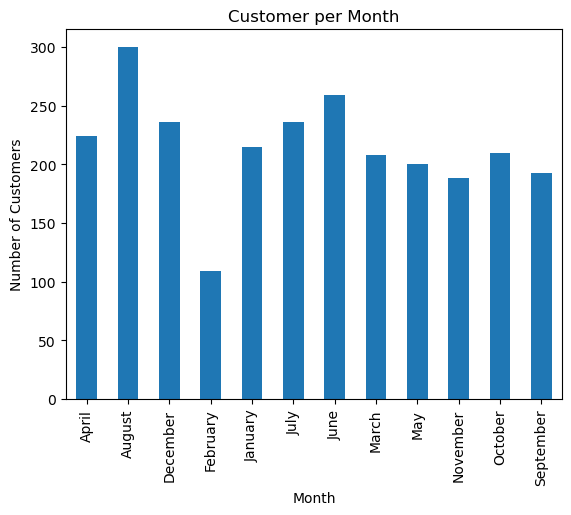

In [51]:
df.groupby(['Month'])['CustomerID'].nunique().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer per Month')

In [52]:
monthly_cust=df.groupby(['Month'])['CustomerID'].nunique().reset_index()

In [53]:
#pip install sorted_months_weekdays

In [54]:
#pip install sort_dataframeby_monthorweek

In [55]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [56]:
monthly_cust=Sort_Dataframeby_Month(df=monthly_cust,monthcolumnname='Month')
monthly_cust

,Month,CustomerID
0,January,215
1,February,109
2,March,208
3,April,224
4,May,200
5,June,259
6,July,236
7,August,300
8,September,193
9,October,210


Text(0.5, 1.0, 'Customer per Month')

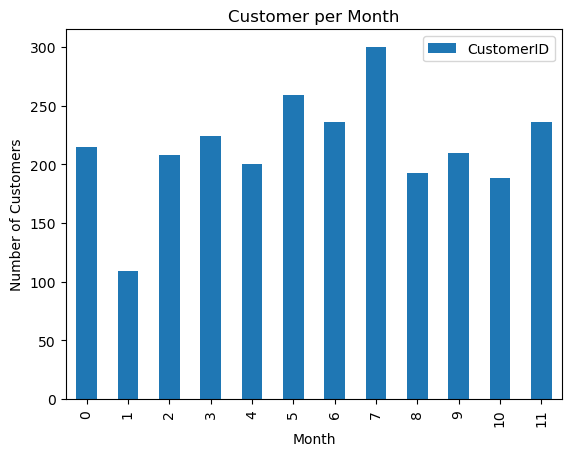

In [57]:
monthly_cust.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer per Month')

### Understand the retention of customers on month on month basis

In [59]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year,Sales,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,2.05,8.7550
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.18,1,87.65,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.18,1,16.50,25.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,F,New York,45,2019-12-31,4000,2058.75,0.10,365,121.30,139.9300
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,F,New York,45,2019-12-31,4000,2058.75,0.18,365,48.92,64.2256
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,F,New York,45,2019-12-31,4000,2058.75,0.10,365,151.88,173.5680
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,F,California,7,2019-12-31,4000,2058.75,0.10,365,402.60,449.3600


In [60]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_index', 'Month', 'Week',
       'Coupon_Code', 'Discount_pct', 'Gender', 'Location', 'Tenure_Months',
       'Date', 'Offline_Spend', 'Online_Spend', 'GST', 'Day Of Year', 'Sales',
       'Invoice Value'],
      dtype='object')

In [61]:
b=df.groupby(['Transaction_ID','CustomerID']).last().reset_index()
b

,Transaction_ID,CustomerID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year,Sales,Invoice Value
0,16679,17850,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810
1,16680,17850,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810
2,16681,17850,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.10,1,2.05,8.7550
3,16682,13047,2019-01-01,GGOEYAAB031816,YouTube Men's Short Sleeve Hero Tee Black,Apparel,5,17.53,6.50,Used,...,M,California,43,2019-01-01,4500,2424.50,0.18,1,87.65,109.9270
4,16682,17850,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.50,Used,...,M,Chicago,12,2019-01-01,4500,2424.50,0.18,1,46.35,61.1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26626,48493,14410,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,F,New York,45,2019-12-31,4000,2058.75,0.10,365,121.30,139.9300
26627,48494,14410,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,F,New York,45,2019-12-31,4000,2058.75,0.18,365,48.92,64.2256
26628,48495,14410,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,F,New York,45,2019-12-31,4000,2058.75,0.10,365,151.88,173.5680
26629,48496,14600,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,F,California,7,2019-12-31,4000,2058.75,0.10,365,402.60,449.3600


In [62]:
customer_count_per_month=b.groupby(['Month_index',b.CustomerID.rename('customer')]).CustomerID.count().reset_index()
customer_count_per_month

,Month_index,customer,CustomerID
0,1,12431,11
1,1,12433,31
2,1,12471,1
3,1,12472,7
4,1,12583,5
...,...,...,...
2573,12,18055,8
2574,12,18178,10
2575,12,18198,5
2576,12,18202,17


In [63]:
customer_firstpurchase=b.groupby('CustomerID')["Month_index"].min().reset_index().rename(columns={'CustomerID':'customer','Month_index':'first_purchase_month'})
customer_firstpurchase

,customer,first_purchase_month
0,12346,9
1,12347,3
2,12348,6
3,12350,12
4,12356,9
...,...,...
1463,18259,4
1464,18260,6
1465,18269,4
1466,18277,10


In [64]:
bfinal=customer_count_per_month.merge(customer_firstpurchase,on='customer')
bfinal

,Month_index,customer,CustomerID,first_purchase_month
0,1,12431,11,1
1,1,12433,31,1
2,1,12471,1,1
3,1,12472,7,1
4,1,12583,5,1
...,...,...,...,...
2573,12,18055,8,2
2574,12,18178,10,4
2575,12,18198,5,8
2576,12,18202,17,12


In [65]:
bfinal.CustomerID=np.where(bfinal.Month_index==bfinal.first_purchase_month,'New','Old')
bfinal

,Month_index,customer,CustomerID,first_purchase_month
0,1,12431,New,1
1,1,12433,New,1
2,1,12471,New,1
3,1,12472,New,1
4,1,12583,New,1
...,...,...,...,...
2573,12,18055,Old,2
2574,12,18178,Old,4
2575,12,18198,Old,8
2576,12,18202,New,12


In [66]:
bfinal.loc[(bfinal["CustomerID"]=="New")]

,Month_index,customer,CustomerID,first_purchase_month
0,1,12431,New,1
1,1,12433,New,1
2,1,12471,New,1
3,1,12472,New,1
4,1,12583,New,1
...,...,...,...,...
2559,12,17672,New,12
2568,12,17929,New,12
2571,12,18017,New,12
2576,12,18202,New,12


In [67]:
print("new customers count per month")
bfinal.loc[(bfinal["CustomerID"]=="New")].groupby('Month_index').CustomerID.count()

new customers count per month


Month_index
1     215
2      96
3     177
4     163
5     112
6     137
7      94
8     135
9      78
10     87
11     68
12    106
Name: CustomerID, dtype: int64

In [68]:
bfinal.CustomerID.value_counts() 

CustomerID
New    1468
Old    1110
Name: count, dtype: int64

In [69]:
df.CustomerID.nunique()

1468

In [70]:
df.Transaction_ID.nunique()

25061

In [71]:
df.loc[:,["Month",'Month_index']]

,Month,Month_index
0,January,1
1,January,1
2,January,1
3,January,1
4,January,1
...,...,...
52919,December,12
52920,December,12
52921,December,12
52922,December,12


In [72]:
non_ret_customer = {}
ret_customer = {}
temp = []
new_customer_id = {}
exist_customer_id = {}
new_customer = {}
exist_customer = {}

for i in range(1,13):
    current_month = set(df[df['Month_index'] == i]['CustomerID'].unique())
    
    prev_month = set(df[df['Month_index'] == i-1]['CustomerID'].unique())
    
    sym = current_month.symmetric_difference(prev_month)
    #returns a set that contains all items from both set, but not the items that are present in both sets.
    
    non_ret_cust = current_month.intersection(sym)#common item
    non_ret_customer[i]=len(non_ret_cust)
    
    ret_cust = current_month.intersection(prev_month)
    ret_customer[i]=len(ret_cust)

    new_cust = [value for value in current_month if value not in temp]
    exist_cust = [value for value in current_month if value in temp]
    temp.extend(current_month)
    new_customer_id[i] = new_cust
    exist_customer_id[i] = exist_cust
    new_customer[i] = len(new_cust)
    exist_customer[i] = len(exist_cust)


In [73]:
new_customer

{1: 215,
 2: 96,
 3: 177,
 4: 163,
 5: 112,
 6: 137,
 7: 94,
 8: 135,
 9: 78,
 10: 87,
 11: 68,
 12: 106}

In [74]:
customer_df = pd.DataFrame()
customer_df['Month']=non_ret_customer.keys()
customer_df['Non_Ret_Cust']=non_ret_customer.values()
customer_df['Ret_Cust']=ret_customer.values()
customer_df['New_Cust']=new_customer.values()
customer_df['Exist_Cust']=exist_customer.values()
customer_df

,Month,Non_Ret_Cust,Ret_Cust,New_Cust,Exist_Cust
0,1,215,0,215,0
1,2,96,13,96,13
2,3,197,11,177,31
3,4,200,24,163,61
4,5,175,25,112,88
5,6,222,37,137,122
6,7,178,58,94,142
7,8,235,65,135,165
8,9,149,44,78,115
9,10,181,29,87,123


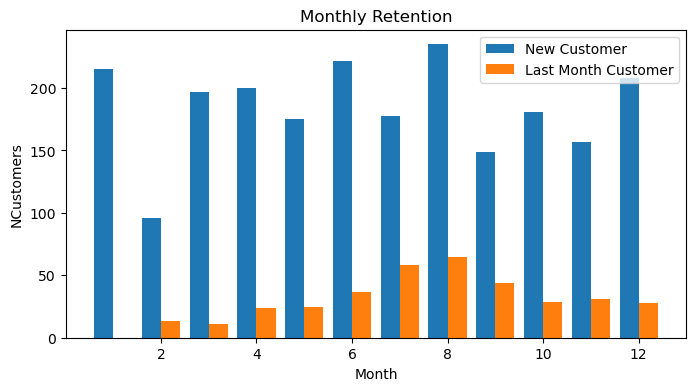

In [75]:
x = range(1,13)
width = 0.4

plt.figure(figsize=(8,4))
plt.bar([pos - width/2 for pos in x], customer_df['Non_Ret_Cust'], width=width, label='New Customer')
plt.bar([pos + width/2 for pos in x], customer_df['Ret_Cust'], width=width, label='Last Month Customer')
plt.xlabel('Month')
plt.ylabel('NCustomers')
plt.title('Monthly Retention')
plt.xticks(rotation=0)
plt.legend()
plt.show()

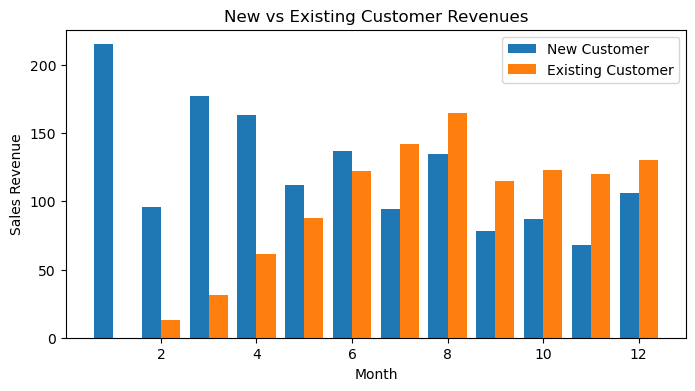

In [77]:
x = range(1,13)
width = 0.4

plt.figure(figsize=(8,4))
plt.bar([pos - width/2 for pos in x], customer_df['New_Cust'], width=width, label='New Customer')
plt.bar([pos + width/2 for pos in x], customer_df['Exist_Cust'], width=width, label='Existing Customer')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('New vs Existing Customer Revenues')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### How the revenues from existing/new customers on month on month basis

In [79]:
new_cust_rev={}
exis_cust_rev={}
for month, id in new_customer_id.items():
    new_cust_rev[month]=df[(df['Month_index']==month)&(df['CustomerID'].isin(id))]['Invoice Value'].sum()
    
for month, id in exist_customer_id.items():    
    exis_cust_rev[month]=df[(df['Month_index']==month)&(df['CustomerID'].isin(id))]['Invoice Value'].sum()
    
customer_df['new_cust_rev']=new_cust_rev.values()
customer_df['exis_cust_rev']=exis_cust_rev.values()
#customer_df['new_cust_rev']=np.where(customer_df['new_cust_rev']<0,customer_df['new_cust_rev']*-1,customer_df['new_cust_rev'])
#customer_df['exis_cust_rev']=np.where(customer_df['exis_cust_rev']<0,customer_df['exis_cust_rev']*-1,customer_df['exis_cust_rev'])

customer_df
    

,Month,Non_Ret_Cust,Ret_Cust,New_Cust,Exist_Cust,new_cust_rev,exis_cust_rev
0,1,215,0,215,0,5.085148e+05,0.000000e+00
1,2,96,13,96,13,3.470810e+05,4.978469e+04
2,3,197,11,177,31,3.782718e+05,7.493324e+04
3,4,200,24,163,61,2.907064e+05,2.018533e+05
4,5,175,25,112,88,4.182808e+06,2.344041e+06
5,6,222,37,137,122,2.369268e+05,1.600761e+05
6,7,178,58,94,142,1.856684e+05,2.796206e+05
7,8,235,65,135,165,2.431146e+05,2.638220e+05
8,9,149,44,78,115,1.808054e+05,2.600170e+05
9,10,181,29,87,123,2.654424e+05,2.301853e+05


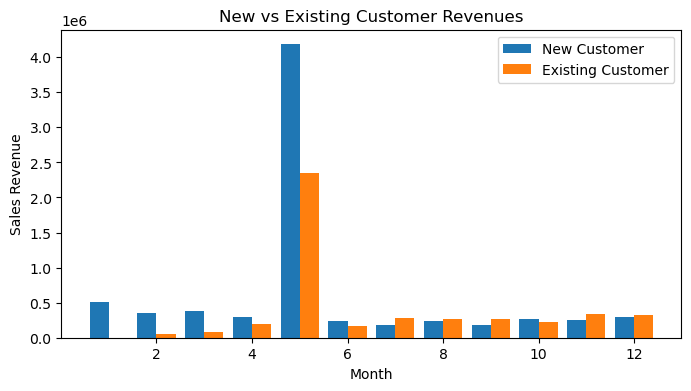

In [80]:
x = range(1,13)
width = 0.4

plt.figure(figsize=(8,4))
plt.bar([pos - width/2 for pos in x], customer_df['new_cust_rev'], width=width, label='New Customer')
plt.bar([pos + width/2 for pos in x], customer_df['exis_cust_rev'], width=width, label='Existing Customer')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('New vs Existing Customer Revenues')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### How the discounts playing role in the revenues?

In [82]:
s=df.groupby('Coupon_Status')['Invoice Value'].sum()


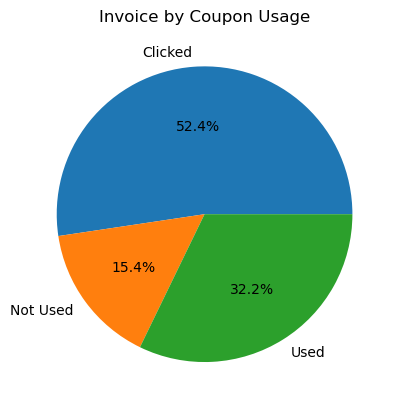

In [83]:
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.title('Invoice by Coupon Usage')
plt.show()

### Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

### Revenue by category

In [86]:
df.groupby('Product_Category')['Invoice Value'].sum()

Product_Category
Accessories             1.360731e+04
Android                 2.969433e+03
Apparel                 2.124410e+06
Backpacks               1.081288e+04
Bags                    4.158100e+05
Bottles                 3.112708e+04
Drinkware               6.358145e+05
Fun                     8.994542e+03
Gift Cards              4.555301e+04
Google                  1.316881e+04
Headgear                1.207784e+05
Housewares              1.731065e+04
Lifestyle               2.531787e+05
More Bags               3.973113e+03
Nest                    5.601860e+05
Nest-Canada             1.558672e+05
Nest-USA                6.345236e+06
Notebooks & Journals    2.405699e+05
Office                  8.587657e+05
Waze                    2.390581e+04
Name: Invoice Value, dtype: float64

<Axes: xlabel='Product_Category'>

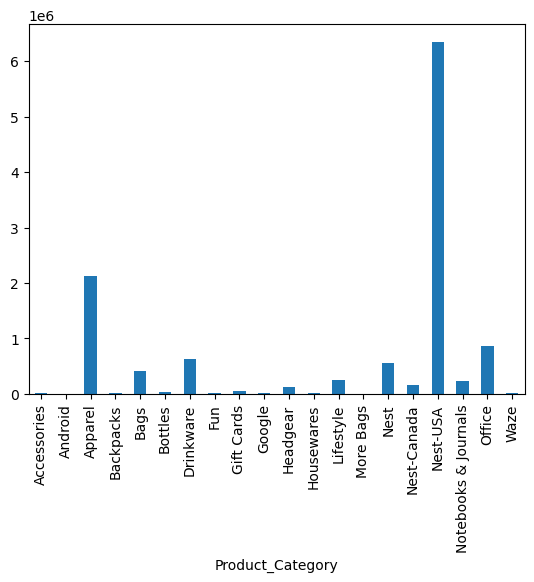

In [87]:
df.groupby('Product_Category')['Invoice Value'].sum().plot(kind='bar')

### Revenue by month

<Axes: xlabel='Month'>

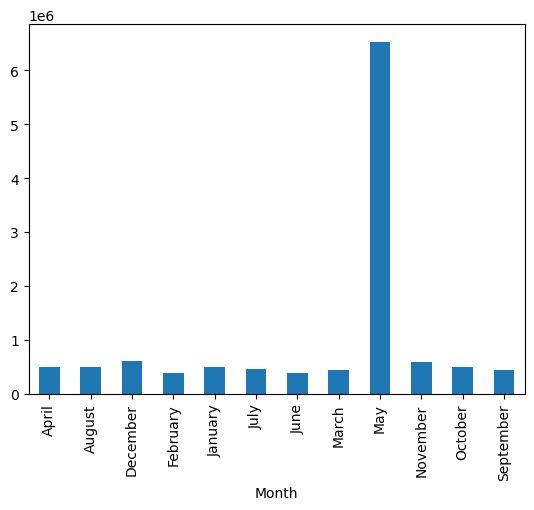

In [89]:
df.groupby('Month')['Invoice Value'].sum().plot(kind='bar')

### Revenue by week

In [91]:
df.groupby('Week')['Invoice Value'].sum()

Week
1     1.357153e+05
2     1.073846e+05
3     1.102939e+05
4     1.128773e+05
5     1.101067e+05
6     9.514661e+04
7     1.062974e+05
8     1.033606e+05
9     9.039588e+04
10    1.008932e+05
11    8.693061e+04
12    1.194320e+05
13    1.005069e+05
14    1.357506e+05
15    9.463513e+04
16    1.504472e+05
17    9.696051e+04
18    1.254543e+06
19    1.463866e+06
20    1.340393e+06
21    1.431061e+06
22    1.077341e+06
23    7.987962e+04
24    1.075997e+05
25    9.386420e+04
26    9.007068e+04
27    8.060188e+04
28    1.153180e+05
29    1.304076e+05
30    9.795943e+04
31    1.441544e+05
32    1.124698e+05
33    1.012937e+05
34    1.036262e+05
35    1.082991e+05
36    7.782835e+04
37    1.124393e+05
38    8.931119e+04
39    1.285903e+05
40    1.090225e+05
41    1.255955e+05
42    1.108444e+05
43    1.033978e+05
44    1.100418e+05
45    1.121860e+05
46    1.190301e+05
47    1.467214e+05
48    1.711215e+05
49    1.604257e+05
50    1.748872e+05
51    1.599813e+05
52    8.073167e+04
Name: I

<Axes: xlabel='Week'>

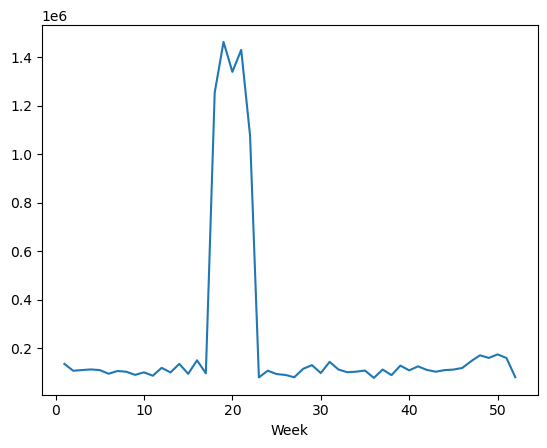

In [92]:
df.groupby('Week')['Invoice Value'].sum().plot(kind='line')

In [93]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year,Sales,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,153.71,175.581
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,153.71,175.581
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.10,1,2.05,8.755
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1,87.65,109.927
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,M,Chicago,12,2019-01-01,4500,2424.5,0.18,1,16.50,25.970


### Revenue by Day

In [95]:
df.groupby('Day Of Year')['Invoice Value'].sum()

Day Of Year
1       9307.9256
2      15713.6240
3      30012.1871
4      20014.6861
5      21819.1642
          ...    
361    15687.6201
362    12583.4946
363    13768.0097
364     9169.8015
365    11585.6555
Name: Invoice Value, Length: 365, dtype: float64

<Axes: xlabel='Day Of Year'>

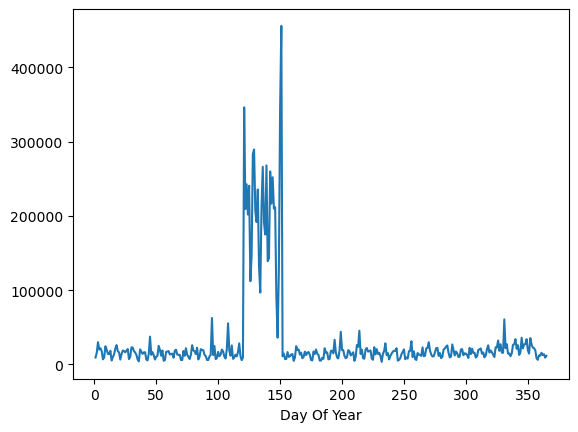

In [96]:
df.groupby('Day Of Year')['Invoice Value'].sum().plot(kind='line')

### Number of orders by Category

In [98]:
df.groupby('Product_Category')['Quantity'].sum()

Product_Category
Accessories              1097
Android                    45
Apparel                 32438
Backpacks                 113
Bags                    15273
Bottles                  2090
Drinkware               30501
Fun                       834
Gift Cards                206
Google                    575
Headgear                 3533
Housewares               2484
Lifestyle               24881
More Bags                 144
Nest                     2837
Nest-Canada               469
Nest-USA                21430
Notebooks & Journals     9556
Office                  88383
Waze                     1144
Name: Quantity, dtype: int64

<Axes: xlabel='Product_Category'>

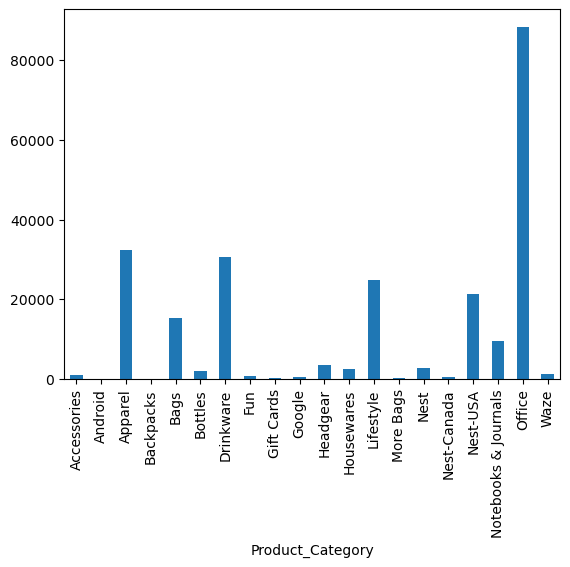

In [99]:
df.groupby('Product_Category')['Quantity'].sum().plot(kind='bar')

### Number of orders by Month

In [101]:
df.groupby('Month')['Quantity'].sum()

Month
April        25277
August       27457
December     12667
February     16575
January      20140
July         22898
June         21619
March        20787
May          18715
November     15120
October      17425
September    19353
Name: Quantity, dtype: int64

<Axes: xlabel='Month'>

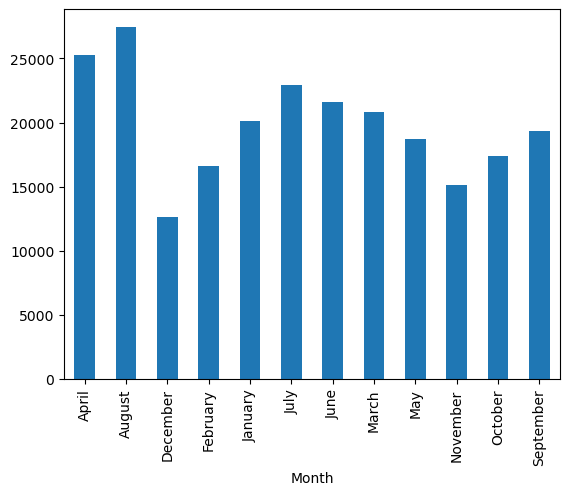

In [102]:
df.groupby('Month')['Quantity'].sum().plot(kind='bar')

### Number of orders by Week

In [104]:
df.groupby('Week')['Quantity'].sum()

Week
1     5964
2     4665
3     4319
4     3074
5     4317
6     3655
7     5255
8     3675
9     3642
10    4574
11    4061
12    5162
13    5372
14    8513
15    4720
16    6879
17    4653
18    4239
19    4868
20    4341
21    3536
22    3540
23    5796
24    7948
25    3227
26    3351
27    3901
28    4164
29    6828
30    5567
31    9472
32    5353
33    5195
34    6467
35    4557
36    4035
37    5658
38    3452
39    4479
40    3777
41    4128
42    4318
43    3880
44    3372
45    3528
46    2920
47    2790
48    4774
49    4209
50    4655
51    2352
52     856
Name: Quantity, dtype: int64

<Axes: xlabel='Week'>

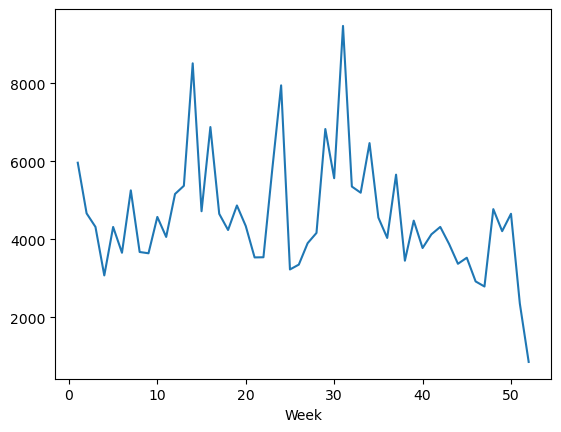

In [105]:
df.groupby('Week')['Quantity'].sum().plot(kind='line')

### Number of orders by Day

In [107]:
df.groupby('Day Of Year')['Quantity'].sum()

Day Of Year
1       352
2       256
3       816
4       604
5      2392
       ... 
361     278
362     114
363     121
364     121
365     112
Name: Quantity, Length: 365, dtype: int64

<Axes: xlabel='Day Of Year'>

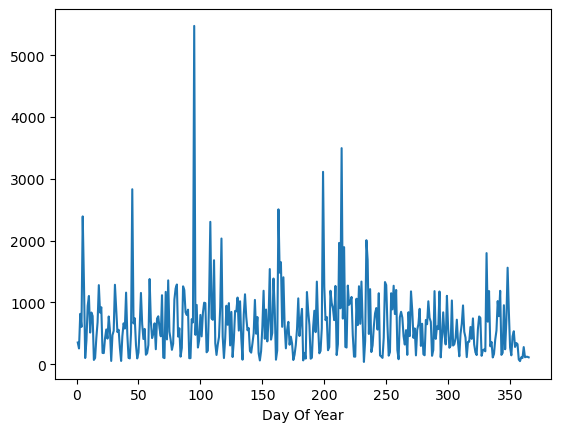

In [108]:
df.groupby('Day Of Year')['Quantity'].sum().plot(kind='line')

In [109]:
#Average order value = Revenue / Transaction per customer
df['Average_order']=df['Invoice Value']/df['Quantity']

In [110]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,Date,Offline_Spend,Online_Spend,GST,Day Of Year,Sales,Invoice Value,Average_order
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810,175.5810
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,Chicago,12,2019-01-01,4500,2424.50,0.10,1,153.71,175.5810,175.5810
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,Chicago,12,2019-01-01,4500,2424.50,0.10,1,2.05,8.7550,8.7550
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,Chicago,12,2019-01-01,4500,2424.50,0.18,1,87.65,109.9270,21.9854
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,Chicago,12,2019-01-01,4500,2424.50,0.18,1,16.50,25.9700,25.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,New York,45,2019-12-31,4000,2058.75,0.10,365,121.30,139.9300,139.9300
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,New York,45,2019-12-31,4000,2058.75,0.18,365,48.92,64.2256,64.2256
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,New York,45,2019-12-31,4000,2058.75,0.10,365,151.88,173.5680,173.5680
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,California,7,2019-12-31,4000,2058.75,0.10,365,402.60,449.3600,89.8720


### Average order value by Category

In [112]:
df.groupby('Product_Category')['Average_order'].sum()

Product_Category
Accessories             6.642782e+03
Android                 2.933535e+03
Apparel                 1.456963e+06
Backpacks               8.789759e+03
Bags                    1.603085e+05
Bottles                 4.127865e+03
Drinkware               1.311265e+05
Fun                     2.375655e+03
Gift Cards              3.323960e+04
Google                  2.665997e+03
Headgear                3.954791e+04
Housewares              1.241823e+03
Lifestyle               5.284522e+04
More Bags               1.382292e+03
Nest                    4.623628e+05
Nest-Canada             1.241616e+05
Nest-USA                4.327277e+06
Notebooks & Journals    2.907067e+04
Office                  1.160222e+05
Waze                    1.672565e+04
Name: Average_order, dtype: float64

<Axes: xlabel='Product_Category'>

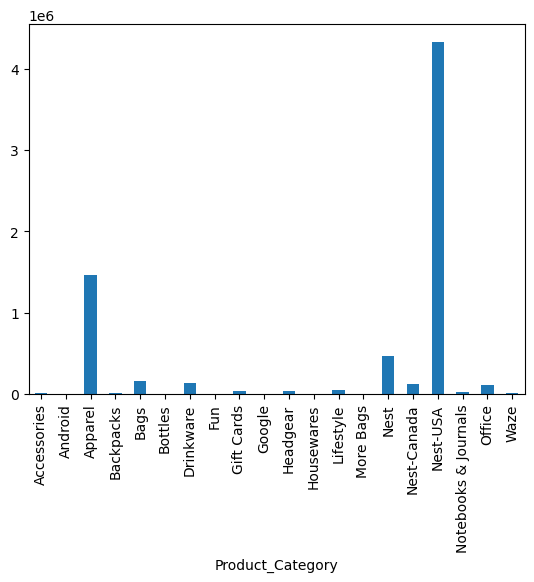

In [113]:
df.groupby('Product_Category')['Average_order'].sum().plot(kind='bar')

### Average order value by Month

In [115]:
df.groupby('Month')['Average_order'].sum()

Month
April        2.235972e+05
August       2.764362e+05
December     4.254003e+05
February     2.206711e+05
January      3.076109e+05
July         2.563772e+05
June         2.329633e+05
March        2.537066e+05
May          3.804537e+06
November     3.905127e+05
October      3.261687e+05
September    2.618294e+05
Name: Average_order, dtype: float64

<Axes: xlabel='Month'>

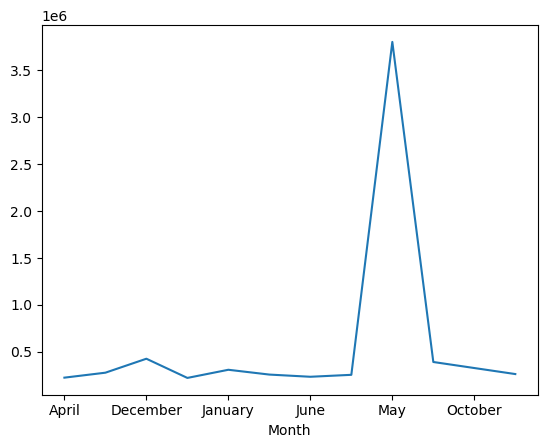

In [116]:
df.groupby('Month')['Average_order'].sum().plot(kind='line')

### Average order value by Week

In [118]:
df.groupby('Week')['Average_order'].sum()

Week
1      85551.020872
2      60700.359344
3      67253.839632
4      70268.588297
5      65764.535095
6      54658.033550
7      54917.951357
8      56026.885511
9      54158.969658
10     59098.534957
11     49969.645632
12     64057.674016
13     54012.056423
14     45549.748308
15     54372.909198
16     61462.906581
17     52920.492187
18    785791.055136
19    824197.380139
20    753871.371007
21    894978.527477
22    570501.609199
23     48474.814110
24     55960.460493
25     59278.453657
26     53737.585393
27     46393.103940
28     65010.408542
29     63934.205494
30     57340.726227
31     66164.852840
32     65079.813942
33     60732.979978
34     56126.708204
35     60586.221204
36     49017.440004
37     55449.771960
38     61435.986899
39     81148.802141
40     71467.257375
41     86978.476403
42     71252.773558
43     65893.322232
44     73192.216215
45     73205.096080
46     75677.137427
47    102505.060128
48    114694.468771
49    105003.116768
50    115378.09

<Axes: xlabel='Week'>

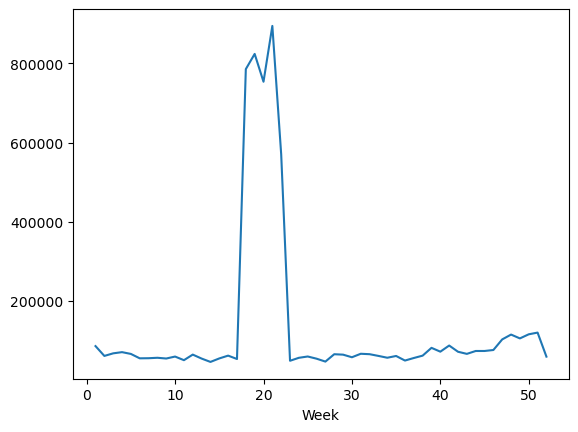

In [119]:
df.groupby('Week')['Average_order'].sum().plot(kind='line')

### Average order value by Day

In [121]:
df.groupby('Day Of Year')['Average_order'].sum()

Day Of Year
1       6524.357078
2      10674.952602
3      18844.180953
4      13209.342243
5      11625.042801
           ...     
361    10684.297961
362    10035.055767
363    10181.558967
364     6800.809800
365     7648.648400
Name: Average_order, Length: 365, dtype: float64

<Axes: xlabel='Day Of Year'>

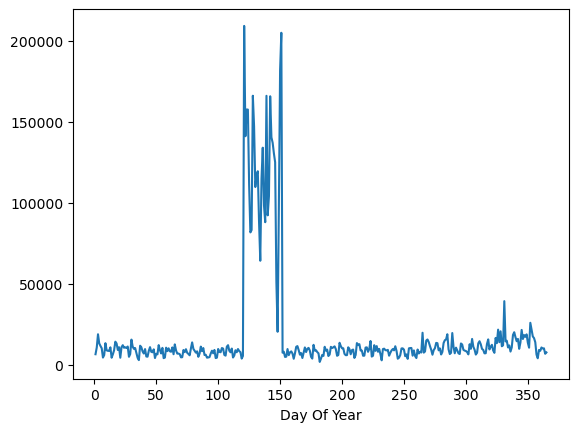

In [122]:
df.groupby('Day Of Year')['Average_order'].sum().plot(kind='line')

### Quantity by Category

In [124]:
df.groupby('Product_Category')['Quantity'].sum()

Product_Category
Accessories              1097
Android                    45
Apparel                 32438
Backpacks                 113
Bags                    15273
Bottles                  2090
Drinkware               30501
Fun                       834
Gift Cards                206
Google                    575
Headgear                 3533
Housewares               2484
Lifestyle               24881
More Bags                 144
Nest                     2837
Nest-Canada               469
Nest-USA                21430
Notebooks & Journals     9556
Office                  88383
Waze                     1144
Name: Quantity, dtype: int64

### Quantity by Month

In [126]:
df.groupby('Month')['Quantity'].sum()

Month
April        25277
August       27457
December     12667
February     16575
January      20140
July         22898
June         21619
March        20787
May          18715
November     15120
October      17425
September    19353
Name: Quantity, dtype: int64

### Quantity by Week

In [128]:
df.groupby('Week')['Quantity'].sum()

Week
1     5964
2     4665
3     4319
4     3074
5     4317
6     3655
7     5255
8     3675
9     3642
10    4574
11    4061
12    5162
13    5372
14    8513
15    4720
16    6879
17    4653
18    4239
19    4868
20    4341
21    3536
22    3540
23    5796
24    7948
25    3227
26    3351
27    3901
28    4164
29    6828
30    5567
31    9472
32    5353
33    5195
34    6467
35    4557
36    4035
37    5658
38    3452
39    4479
40    3777
41    4128
42    4318
43    3880
44    3372
45    3528
46    2920
47    2790
48    4774
49    4209
50    4655
51    2352
52     856
Name: Quantity, dtype: int64

### Quantity by Day

In [130]:
df.groupby('Day Of Year')['Quantity'].sum()

Day Of Year
1       352
2       256
3       816
4       604
5      2392
       ... 
361     278
362     114
363     121
364     121
365     112
Name: Quantity, Length: 365, dtype: int64

### Understand the trends/seasonality of sales by category, location, month etc…

In [132]:
df.groupby('Product_Category')['Sales'].sum()

Product_Category
Accessories                7295.88
Android                     711.03
Apparel                  591145.80
Backpacks                  8772.69
Bags                     151314.43
Bottles                    6923.65
Drinkware                200707.83
Fun                        6029.01
Gift Cards                19533.82
Google                     9420.47
Headgear                  53471.44
Housewares                 4637.32
Lifestyle                 74385.70
More Bags                  2946.96
Nest                     518193.50
Nest-Canada               70910.40
Nest-USA                2554202.39
Notebooks & Journals     107085.96
Office                   276794.40
Waze                       6311.94
Name: Sales, dtype: float64

<Axes: xlabel='Product_Category'>

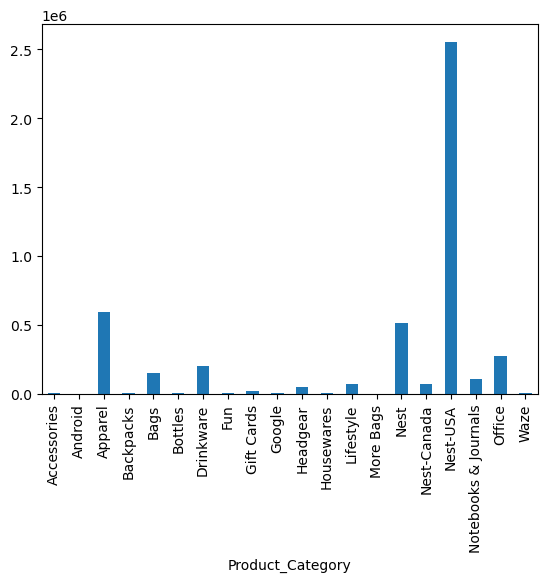

In [133]:
df.groupby('Product_Category')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='Location'>

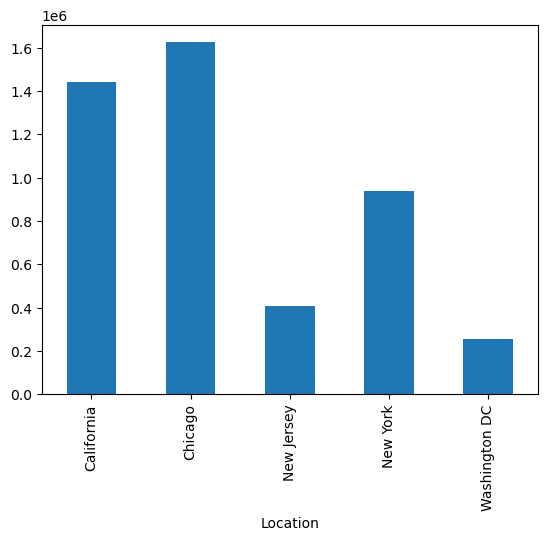

In [134]:
df.groupby('Location')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='Month_index'>

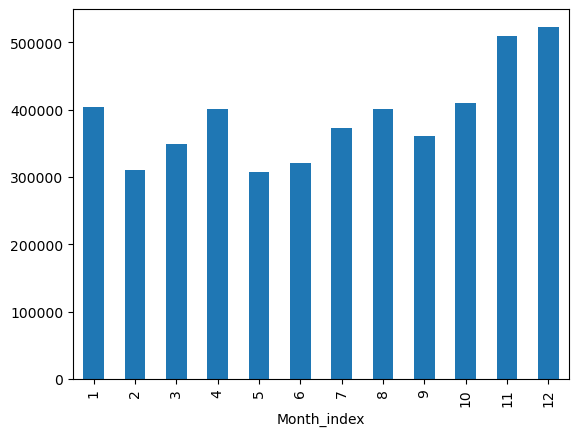

In [135]:
df.groupby('Month_index')['Sales'].sum().plot(kind='bar')

### How number order varies and sales with different days?

In [137]:
df.groupby('Day Of Year').agg({'Quantity':'count','Sales':sum})


,Quantity,Sales
Day Of Year,,
1,89,7380.49
2,115,13438.47
3,207,23834.21
4,169,16603.41
5,189,17373.19
...,...,...
361,103,13661.59
362,80,10994.42
363,89,12011.27


### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

### Revenue by month

In [140]:
df.groupby(['Month_index','Month'])['Invoice Value'].sum()

Month_index  Month    
1            January      5.085148e+05
2            February     3.968657e+05
3            March        4.532051e+05
4            April        4.925597e+05
5            May          6.526849e+06
6            June         3.970029e+05
7            July         4.652890e+05
8            August       5.069366e+05
9            September    4.408224e+05
10           October      4.956277e+05
11           November     5.867007e+05
12           December     6.116649e+05
Name: Invoice Value, dtype: float64

### Marketing spend by month

In [142]:
df['marketing_spend']=df['Offline_Spend']+df['Online_Spend']

In [143]:
df.groupby(['Month_index','Month'])['marketing_spend'].sum()

Month_index  Month    
1            January      20052775.17
2            February     15841536.05
3            March        17453780.31
4            April        21655922.13
5            May          17525521.02
6            June         18625403.73
7            July         20618934.41
8            August       28385733.77
9            September    19257626.34
10           October      20536272.39
11           November     21096299.69
12           December     28964402.01
Name: marketing_spend, dtype: float64

### percentage of marketing spend out of revenue ,Delivery Charge,GST by month

In [145]:
daily_sales = df.groupby(['Transaction_Date'], as_index = False)[['Invoice Value','Delivery_Charges','GST']].sum()
daily_sales.columns = ['Transaction_Date', 'Invoice Value','Delivery_Charges','GST']
daily_sales



,Transaction_Date,Invoice Value,Delivery_Charges,GST
0,2019-01-01,9307.9256,1082.23,11.95
1,2019-01-02,15713.6240,872.00,14.47
2,2019-01-03,30012.1871,3650.24,26.00
3,2019-01-04,20014.6861,1501.94,22.64
4,2019-01-05,21819.1642,2411.29,25.78
...,...,...,...,...
360,2019-12-27,15687.6201,771.40,11.60
361,2019-12-28,12583.4946,680.58,8.37
362,2019-12-29,13768.0097,602.87,10.07
363,2019-12-30,9169.8015,411.18,6.10


In [146]:
daily_sales.info(),spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_Date  365 non-null    datetime64[ns]
 1   Invoice Value     365 non-null    float64       
 2   Delivery_Charges  365 non-null    float64       
 3   GST               365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


(None, None)

In [147]:
spend_sales = pd.merge(daily_sales, spend, how = 'left', left_on= 'Transaction_Date',right_on='Date')
spend_sales['Month'] = spend_sales['Transaction_Date'].dt.strftime('%m')
spend_sales['TotalSpend'] = spend_sales['Offline_Spend'] + spend_sales['Online_Spend']
invo = spend_sales.groupby('Month')['Invoice Value'].sum().reset_index()
#invo
tspe = spend_sales.groupby('Month')['TotalSpend'].sum().reset_index()
tgst=spend_sales.groupby('Month')['GST'].sum().reset_index()
tdch=spend_sales.groupby('Month')['Delivery_Charges'].sum().reset_index()
result = invo.merge(tspe, on='Month', how='inner').merge(tgst,on='Month',how='inner').merge(tdch,on='Month',how='inner')
result['Percent_Spend'] = 100 * result['TotalSpend'] / result['Invoice Value']
result['Percent_Del_Charge'] = 100 * result['Delivery_Charges'] / result['Invoice Value']

result['Percent_GST'] = 100 * result['GST'] / result['Invoice Value']

result
#spend_sales

,Month,Invoice Value,TotalSpend,GST,Delivery_Charges,Percent_Spend,Percent_Del_Charge,Percent_GST
0,01,5.085148e+05,154928.95,535.06,59242.32,30.466953,11.650069,0.105220
1,02,3.968657e+05,137107.92,447.00,49216.60,34.547691,12.401325,0.112633
2,03,4.532051e+05,122250.09,616.01,60799.94,26.974564,13.415547,0.135923
3,04,4.925597e+05,157026.83,591.56,41481.74,31.879755,8.421667,0.120099
4,05,6.526849e+06,118259.64,662.23,41396.17,1.811895,0.634244,0.010146
5,06,3.970029e+05,134318.14,600.45,37513.58,33.833035,9.449195,0.151246
6,07,4.652890e+05,120217.85,760.71,48723.93,25.837242,10.471756,0.163492
7,08,5.069366e+05,142904.15,913.41,61099.57,28.189747,12.052704,0.180182
8,09,4.408224e+05,135514.54,597.06,41005.42,30.741299,9.302027,0.135442
9,10,4.956277e+05,151224.65,541.50,45961.88,30.511742,9.273468,0.109255


### Tax by month

In [149]:
df.groupby(['Month_index','Month'])['GST'].sum()

Month_index  Month    
1            January      535.06
2            February     447.00
3            March        616.01
4            April        591.56
5            May          662.23
6            June         600.45
7            July         760.71
8            August       913.41
9            September    597.06
10           October      541.50
11           November     461.16
12           December     548.88
Name: GST, dtype: float64

### How marketing spend is impacting on revenue?

In [151]:
correlation = result['TotalSpend'].corr(result['Invoice Value'])

# Print the correlation coefficient
print("Correlation between Marketing Spend and Revenue:", correlation)

Correlation between Marketing Spend and Revenue: -0.33970791354195223


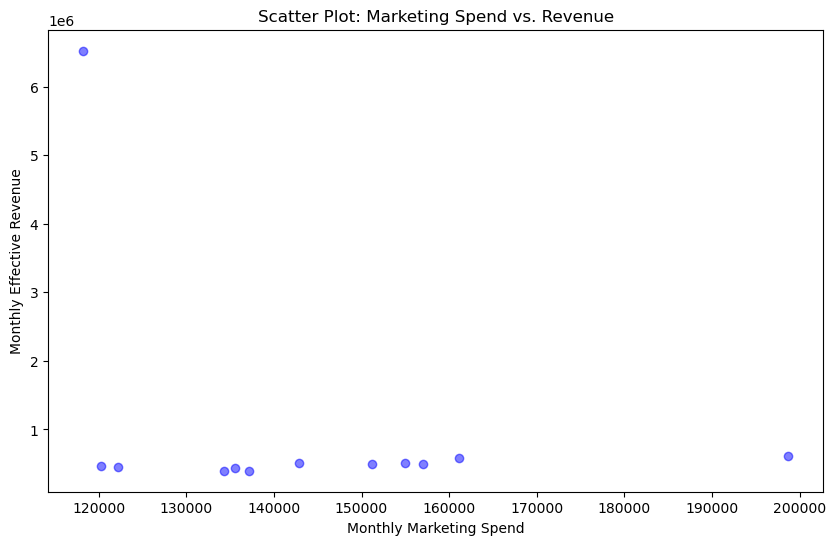

In [152]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result['TotalSpend'], result['Invoice Value'], c='blue', alpha=0.5)

# Add labels and a title
plt.xlabel('Monthly Marketing Spend')
plt.ylabel('Monthly Effective Revenue')
plt.title('Scatter Plot: Marketing Spend vs. Revenue')

# Show the plot
plt.show()

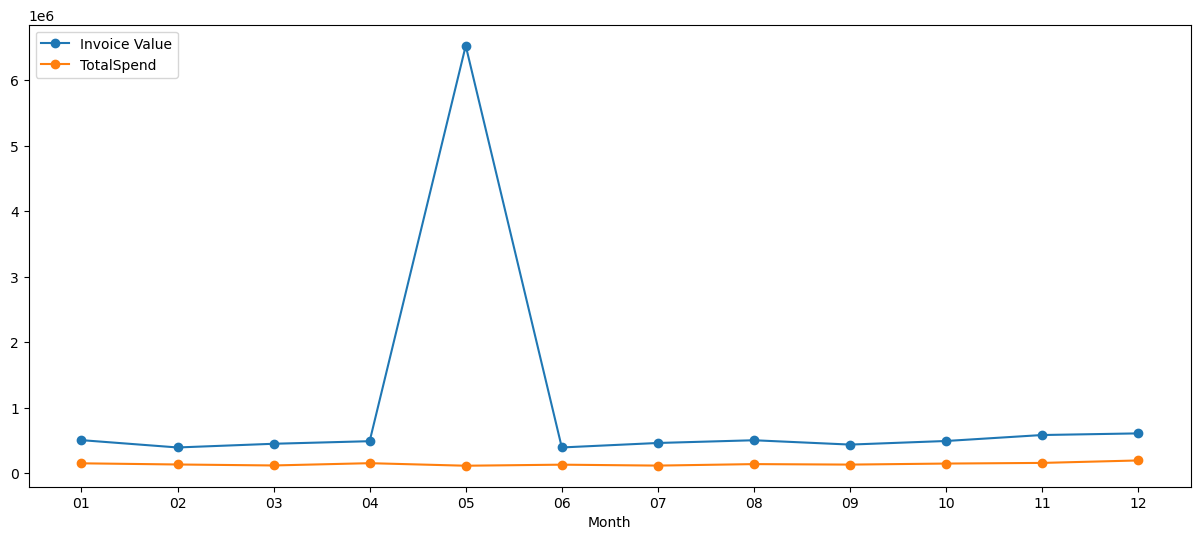

In [153]:
plt.figure(figsize=(15,6))
plt.plot(result.Month,result['Invoice Value'],label='Invoice Value',marker='o')
plt.plot(result.Month,result.TotalSpend,label='TotalSpend',marker='o')

plt.xlabel('Month')
#plt.ylabel('Number of units sold')
plt.legend(loc='upper left')
plt.show()

### Which product was appeared in the transactions?

In [155]:
df.Product_SKU.value_counts()

Product_SKU
GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
                  ... 
GGOEAAWQ063049       1
GGOEYAEB030014       1
GGOEGAHB057413       1
GGOEWALJ083416       1
GGOEGOCJ093999       1
Name: count, Length: 1145, dtype: int64

### Which product was purchased mostly based on the quantity?

In [157]:
q=df.groupby('Product_SKU')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).reset_index(drop=True)
q

,Product_SKU,Quantity
0,GGOEGGOA017399,16234
1,GGOEGDHC018299,9728
2,GGOEGBMJ013399,7321
3,GGOEGOLC014299,6496
4,GGOEGFKQ020399,5847
...,...,...
1140,GGOEGAXR066029,1
1141,GGOEGAXT065429,1
1142,GGOEGAQJ058715,1
1143,GGOEGAEB031513,1


In [158]:
print(q.iloc[0,0],'was purchased mostly based on the quantity ')

GGOEGGOA017399 was purchased mostly based on the quantity 


## 3. Performing Customer Segmentation

### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same. 

In [161]:
# Calculate Recency, Frequency, and Monetary values
#current_date1 = max(df['Transaction_Date']) 
#current_date
current_date=pd.to_datetime('now')

In [162]:
rfm = df.groupby('CustomerID').agg({'Transaction_Date': lambda x: (current_date - x.max()).days,# Recency
    'CustomerID': 'count',  # Frequency
    'Invoice Value': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,1851,2,185.6882
12347,1803,60,16567.9470
12348,1817,23,1842.8708
12350,1761,17,1636.2142
12356,1851,36,2231.7198
...,...,...,...
18259,2014,7,873.8902
18260,1831,40,3272.6406
18269,1938,8,171.0864


In [163]:
# RFM scoring
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

In [164]:
def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

In [165]:
rfm['R'] = rfm['Recency'].apply(r_score)
rfm['F'] = rfm['Frequency'].apply(fm_score, args=('Frequency',))
rfm['M'] = rfm['Monetary'].apply(fm_score, args=('Monetary',))
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,1851,2,185.6882,3,1,1
12347,1803,60,16567.9470,3,4,4
12348,1817,23,1842.8708,3,3,2
12350,1761,17,1636.2142,4,2,2
12356,1851,36,2231.7198,3,3,2
...,...,...,...,...,...,...
18259,2014,7,873.8902,1,1,1
18260,1831,40,3272.6406,3,3,3
18269,1938,8,171.0864,2,1,1


In [166]:
# Combine the R, F, and M scores into a single RFM segment
rfm['RFM_Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,1851,2,185.6882,3,1,1,311
12347,1803,60,16567.9470,3,4,4,344
12348,1817,23,1842.8708,3,3,2,332
12350,1761,17,1636.2142,4,2,2,422
12356,1851,36,2231.7198,3,3,2,332
...,...,...,...,...,...,...,...
18259,2014,7,873.8902,1,1,1,111
18260,1831,40,3272.6406,3,3,3,333
18269,1938,8,171.0864,2,1,1,211


In [167]:
rfm.groupby('RFM_Segment')['RFM_Segment'].count()

RFM_Segment
111     99
112     29
113      4
114      8
121     14
122     55
123     15
124     11
132     15
133     39
134     18
143     14
144     45
211     93
212     15
213      1
214      2
221     29
222     54
223     11
224      6
232     29
233     38
234     14
242      1
243     25
244     43
311     61
312     23
313      1
314      2
321     23
322     42
323      9
324      3
331      2
332     20
333     69
334     12
343     36
344     69
411     39
412     18
414      1
421      7
422     51
423     22
432     15
433     67
434     21
443     16
444    112
Name: RFM_Segment, dtype: int64

In [168]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 12346 to 18283
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      1468 non-null   int64  
 1   Frequency    1468 non-null   int64  
 2   Monetary     1468 non-null   float64
 3   R            1468 non-null   int64  
 4   F            1468 non-null   int64  
 5   M            1468 non-null   int64  
 6   RFM_Segment  1468 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 91.8+ KB


In [169]:
# Define your RFM segments and strategies
segment_mapping = {
    '444': 'Premium',
    '311': 'Gold',
    '344':'Gold',
    '332':'Gold',
    '422':'Gold',
    '144': 'Silver',
    '111': 'Standard'
}
rfm['Segment'] = rfm['RFM_Segment'].map(segment_mapping)
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Segment
CustomerID,,,,,,,,
12346,1851,2,185.6882,3,1,1,311,Gold
12347,1803,60,16567.9470,3,4,4,344,Gold
12348,1817,23,1842.8708,3,3,2,332,Gold
12350,1761,17,1636.2142,4,2,2,422,Gold
12356,1851,36,2231.7198,3,3,2,332,Gold
...,...,...,...,...,...,...,...,...
18259,2014,7,873.8902,1,1,1,111,Standard
18260,1831,40,3272.6406,3,3,3,333,NaN
18269,1938,8,171.0864,2,1,1,211,NaN


### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [171]:
rfm = df.groupby('CustomerID').agg({'Transaction_Date': lambda x: (current_date - x.max()).days,# Recency
    'CustomerID': 'count',  # Frequency
    'Invoice Value': 'sum'  # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,1851,2,185.6882
12347,1803,60,16567.9470
12348,1817,23,1842.8708
12350,1761,17,1636.2142
12356,1851,36,2231.7198
...,...,...,...
18259,2014,7,873.8902
18260,1831,40,3272.6406
18269,1938,8,171.0864


In [172]:
rfm.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

<Axes: xlabel='Monetary', ylabel='Density'>

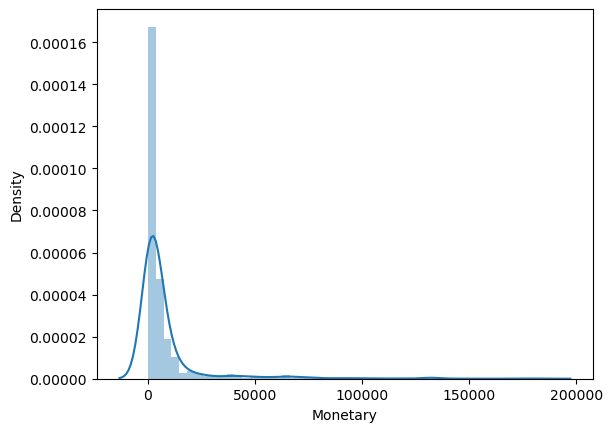

In [173]:
sns.distplot(rfm["Monetary"])

In [174]:
from sklearn.cluster import KMeans


In [175]:
X=rfm
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,1851,2,185.6882
12347,1803,60,16567.9470
12348,1817,23,1842.8708
12350,1761,17,1636.2142
12356,1851,36,2231.7198


In [176]:
# Determine the optimal number of clusters (K) using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [177]:
wcss

[525041979298.8495,
 141729948788.398,
 62556158315.927734,
 38053062255.15061,
 24327765819.766277,
 18469711590.310528,
 13147425112.14149,
 9079573503.576876,
 6664656926.406646,
 5378337373.005851]

In [178]:
kmeans.predict(X)

array([0, 5, 0, ..., 0, 0, 9])

In [179]:
kmeans.labels_

array([0, 5, 0, ..., 0, 0, 9])

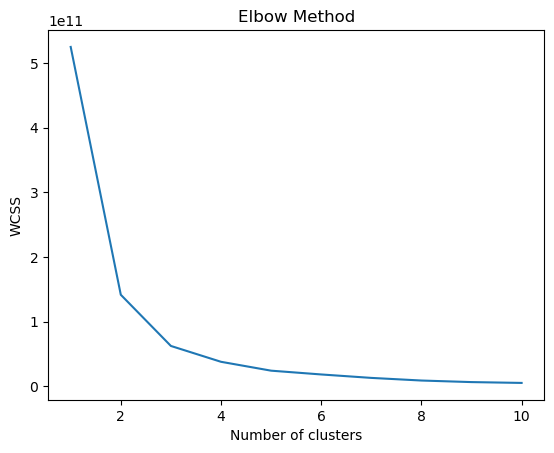

In [180]:
# Plot the Elbow method to find the optimal K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

#### First define dependent variable with categories low value, medium value, high value using customer revenue.

#### Then perform Classification model

In [184]:
rfm.shape,df.shape

((1468, 3), (52924, 27))

In [185]:
merged_data = pd.merge(df, rfm, on='CustomerID')
merged_data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Online_Spend,GST,Day Of Year,Sales,Invoice Value,Average_order,marketing_spend,Recency,Frequency,Monetary
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,2424.50,0.10,1,153.71,175.5810,175.5810,6924.50,2083,297,41682.8425
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,2424.50,0.10,1,153.71,175.5810,175.5810,6924.50,2083,297,41682.8425
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,2424.50,0.10,1,2.05,8.7550,8.7550,6924.50,2083,297,41682.8425
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,2424.50,0.18,1,87.65,109.9270,21.9854,6924.50,2083,297,41682.8425
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,2424.50,0.18,1,16.50,25.9700,25.9700,6924.50,2083,297,41682.8425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,2058.75,0.10,365,121.30,139.9300,139.9300,6058.75,1744,8,1250.5751
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,2058.75,0.18,365,48.92,64.2256,64.2256,6058.75,1744,8,1250.5751
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,2058.75,0.10,365,151.88,173.5680,173.5680,6058.75,1744,8,1250.5751
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,2058.75,0.10,365,402.60,449.3600,89.8720,6058.75,1744,2,823.6380


In [186]:
df.head()# Define your own CLV categories based on revenue thresholds
low_value_threshold = 1000
high_value_threshold = 5000

def categorize_clv(revenue):
    if revenue < low_value_threshold:
        return 'Low Value'
    elif revenue < high_value_threshold:
        return 'Medium Value'
    else:
        return 'High Value'

merged_data['CLV_Category'] = merged_data['Invoice Value'].apply(categorize_clv)
merged_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Day Of Year,Sales,Invoice Value,Average_order,marketing_spend,Recency,Frequency,Monetary,CLV_Category
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,1,153.71,175.581,175.5810,6924.5,2083,297,41682.8425,Low Value
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,1,153.71,175.581,175.5810,6924.5,2083,297,41682.8425,Low Value
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.10,1,2.05,8.755,8.7550,6924.5,2083,297,41682.8425,Low Value
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.18,1,87.65,109.927,21.9854,6924.5,2083,297,41682.8425,Low Value
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.18,1,16.50,25.970,25.9700,6924.5,2083,297,41682.8425,Low Value


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [189]:
# Select features and target variable
X = merged_data[['Recency', 'Frequency', 'Monetary']]
y = merged_data['CLV_Category']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




#### Linear Regressiabson

In [191]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [192]:
y_pred1 = lr.predict(X_test)
y_pred1

array(['Medium Value', 'Low Value', 'Low Value', ..., 'Low Value',
       'Low Value', 'Low Value'], dtype=object)

In [193]:
print("Accuracy from Logistic Regression:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Accuracy from Logistic Regression: 0.964950401511573
              precision    recall  f1-score   support

  High Value       0.00      0.00      0.00        55
   Low Value       0.97      0.99      0.98     10250
Medium Value       0.25      0.08      0.12       280

    accuracy                           0.96     10585
   macro avg       0.41      0.36      0.37     10585
weighted avg       0.95      0.96      0.95     10585



#### Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [196]:
dt=DecisionTreeClassifier(max_depth=2, criterion='entropy',min_samples_split=50)

dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=50)

In [197]:
y_pred2 = lr.predict(X_test)
y_pred2

array(['Medium Value', 'Low Value', 'Low Value', ..., 'Low Value',
       'Low Value', 'Low Value'], dtype=object)

In [198]:
print("Accuracy from Decision Tree Classifier:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy from Decision Tree Classifier: 0.964950401511573
              precision    recall  f1-score   support

  High Value       0.00      0.00      0.00        55
   Low Value       0.97      0.99      0.98     10250
Medium Value       0.25      0.08      0.12       280

    accuracy                           0.96     10585
   macro avg       0.41      0.36      0.37     10585
weighted avg       0.95      0.96      0.95     10585



#### Random Forest Classifier

In [200]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [201]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array(['Low Value', 'Low Value', 'Low Value', ..., 'Low Value',
       'Low Value', 'Low Value'], dtype=object)

In [202]:
# Evaluate the model
print("Accuracy from Random Forest Classifir:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy from Random Forest Classifir: 0.9686348606518659
              precision    recall  f1-score   support

  High Value       0.33      0.04      0.07        55
   Low Value       0.97      1.00      0.98     10250
Medium Value       0.52      0.05      0.09       280

    accuracy                           0.97     10585
   macro avg       0.61      0.36      0.38     10585
weighted avg       0.95      0.97      0.96     10585



#### Random Forest has high accuracy score

In [204]:
pred_df = pd.concat([merged_data,pd.Series(y_pred,name='CLV_Category_pred')],axis=1)

In [205]:
pred_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day Of Year,Sales,Invoice Value,Average_order,marketing_spend,Recency,Frequency,Monetary,CLV_Category,CLV_Category_pred
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,1,153.71,175.581,175.5810,6924.5,2083,297,41682.8425,Low Value,Low Value
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,1,153.71,175.581,175.5810,6924.5,2083,297,41682.8425,Low Value,Low Value
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,1,2.05,8.755,8.7550,6924.5,2083,297,41682.8425,Low Value,Low Value
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,1,87.65,109.927,21.9854,6924.5,2083,297,41682.8425,Low Value,Low Value
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,1,16.50,25.970,25.9700,6924.5,2083,297,41682.8425,Low Value,Low Value


In [230]:
pred_df.tail(10)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day Of Year,Sales,Invoice Value,Average_order,marketing_spend,Recency,Frequency,Monetary,CLV_Category,CLV_Category_pred
52914,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,...,365,100.91,112.4555,112.455500,6058.75,1744,8,1250.5751,Low Value,NaN
52915,14410,48491,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Not Used,...,365,121.30,139.9300,139.930000,6058.75,1744,8,1250.5751,Low Value,NaN
52916,14410,48491,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2,80.52,6.50,Clicked,...,365,161.04,183.6440,91.822000,6058.75,1744,8,1250.5751,Low Value,NaN
52917,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.50,Clicked,...,365,100.91,112.4555,112.455500,6058.75,1744,8,1250.5751,Low Value,NaN
52918,14410,48492,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.50,Clicked,...,365,302.73,324.3665,108.122167,6058.75,1744,8,1250.5751,Low Value,NaN
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,365,121.30,139.9300,139.930000,6058.75,1744,8,1250.5751,Low Value,NaN
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,365,48.92,64.2256,64.225600,6058.75,1744,8,1250.5751,Low Value,NaN
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,365,151.88,173.5680,173.568000,6058.75,1744,8,1250.5751,Low Value,NaN
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,365,402.60,449.3600,89.872000,6058.75,1744,2,823.6380,Low Value,NaN
52923,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,...,365,322.08,374.2780,93.569500,6058.75,1744,2,823.6380,Low Value,NaN


### 5. Cross-Selling (Which products are selling together)
#### You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [207]:
basket = (merged_data.groupby(['Transaction_ID',  'Product_Category'])['Quantity'].sum())#.unstack().reset_index().fillna(0).set_index('Transaction_ID'))

In [208]:
basket

Transaction_ID  Product_Category
16679           Nest-USA             1
16680           Nest-USA             1
16681           Office               1
16682           Apparel             10
                Bags                16
                                    ..
48493           Nest-USA             1
48494           Apparel              1
48495           Nest-USA             1
48496           Nest-USA             5
48497           Nest-USA             4
Name: Quantity, Length: 34176, dtype: int64

In [209]:
basket = (merged_data.groupby(['Transaction_ID',  'Product_Category'])['Quantity'].sum().unstack())#.reset_index().fillna(0).set_index('Transaction_ID'))

In [210]:
basket

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
16682,NaN,NaN,10.0,NaN,16.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
16684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
48494,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [211]:
basket = (merged_data.groupby(['Transaction_ID',  'Product_Category'])['Quantity'].sum().unstack().reset_index())#.fillna(0).set_index('Transaction_ID'))
basket

Product_Category,Transaction_ID,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,16679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,16680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,16681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,16682,NaN,NaN,10.0,NaN,16.0,NaN,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
4,16684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25056,48493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25057,48494,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25058,48495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
25059,48496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [212]:
basket = (merged_data.groupby(['Transaction_ID',  'Product_Category'])['Quantity'].sum().unstack().reset_index().fillna(0))#.set_index('Transaction_ID'))
basket

Product_Category,Transaction_ID,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,...,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16682,0.0,0.0,10.0,0.0,16.0,0.0,35.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0
4,16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25056,48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25057,48494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25058,48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25059,48496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [213]:
basket = (merged_data.groupby(['Transaction_ID',  'Product_Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID'))
basket

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16682,0.0,0.0,10.0,0.0,16.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [214]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

In [215]:
basket_sets = basket.applymap(encode_units)

In [216]:
basket_sets

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
16680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
16681,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
16682,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
16684,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
48494,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [217]:
#from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [218]:
pip install mlxtend

In [219]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)


In [220]:
#patterns = apriori(records , min_support = 0.01,min_confidence=0.009,min_lift=2,min_length=2)

In [221]:
frequent_itemsets

,support,itemsets
0,0.324369,(Apparel)
1,0.061650,(Bags)
2,0.010295,(Bottles)
3,0.100714,(Drinkware)
4,0.026894,(Headgear)
5,0.068313,(Lifestyle)
6,0.078768,(Nest)
7,0.010295,(Nest-Canada)
8,0.463908,(Nest-USA)
9,0.024740,(Notebooks & Journals)


In [222]:
# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bags),(Apparel),0.061650,0.324369,0.025657,0.416181,1.283051,0.005660,1.157262,0.235101
1,(Apparel),(Bags),0.324369,0.061650,0.025657,0.079100,1.283051,0.005660,1.018949,0.326520
2,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
3,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
4,(Headgear),(Apparel),0.026894,0.324369,0.017318,0.643917,1.985140,0.008594,1.897398,0.509973
...,...,...,...,...,...,...,...,...,...,...
69,"(Lifestyle, Drinkware)",(Office),0.025857,0.140697,0.016719,0.646605,4.595736,0.013081,2.431566,0.803175
70,"(Drinkware, Office)",(Lifestyle),0.046287,0.068313,0.016719,0.361207,5.287504,0.013557,1.458511,0.850229
71,(Lifestyle),"(Drinkware, Office)",0.068313,0.046287,0.016719,0.244743,5.287504,0.013557,1.262766,0.870330
72,(Office),"(Lifestyle, Drinkware)",0.140697,0.025857,0.016719,0.118832,4.595736,0.013081,1.105513,0.910513


In [223]:
# Now, rules contain your association rules for cross-selling. 
# You can sort and view the rules as follows:
rules.sort_values(['confidence', 'lift'], ascending =[False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,"(Bags, Lifestyle)",(Office),0.014963,0.140697,0.010175,0.680000,4.833091,0.008070,2.685323,0.805141
56,"(Bags, Drinkware)",(Office),0.021707,0.140697,0.014285,0.658088,4.677354,0.011231,2.513231,0.803649
69,"(Lifestyle, Drinkware)",(Office),0.025857,0.140697,0.016719,0.646605,4.595736,0.013081,2.431566,0.803175
4,(Headgear),(Apparel),0.026894,0.324369,0.017318,0.643917,1.985140,0.008594,1.897398,0.509973
24,(Notebooks & Journals),(Office),0.024740,0.140697,0.013846,0.559677,3.977900,0.010365,1.951531,0.767601
...,...,...,...,...,...,...,...,...,...,...
55,(Apparel),"(Lifestyle, Office)",0.324369,0.035114,0.017078,0.052651,1.499417,0.005688,1.018511,0.492982
42,(Apparel),"(Lifestyle, Drinkware)",0.324369,0.025857,0.013567,0.041826,1.617578,0.005180,1.016666,0.565089
36,(Apparel),"(Bags, Office)",0.324369,0.026336,0.012210,0.037643,1.429351,0.003668,1.011750,0.444594
31,(Apparel),"(Bags, Drinkware)",0.324369,0.021707,0.010694,0.032968,1.518788,0.003653,1.011645,0.505572


In [224]:
from mlxtend.frequent_patterns import fpmax
cs=basket_sets
fpmax(cs,min_support=0.01,use_colnames=True)

,support,itemsets
0,0.010295,(Bottles)
1,0.010295,(Nest-Canada)
2,0.017637,(Waze)
3,0.010614,"(Notebooks & Journals, Apparel)"
4,0.013846,"(Notebooks & Journals, Office)"
5,0.017318,"(Headgear, Apparel)"
6,0.010175,"(Bags, Lifestyle, Office)"
7,0.010694,"(Bags, Drinkware, Apparel)"
8,0.014285,"(Bags, Drinkware, Office)"
9,0.012210,"(Office, Apparel, Bags)"


In [225]:
fpmax(cs,min_support=0.01,use_colnames=True).tail(10).itemsets.iloc[::-1]

15                (Apparel, Nest-USA)
14       (Office, Drinkware, Apparel)
13                   (Nest, Nest-USA)
12       (Office, Lifestyle, Apparel)
11     (Lifestyle, Office, Drinkware)
10    (Lifestyle, Apparel, Drinkware)
9             (Office, Apparel, Bags)
8           (Bags, Drinkware, Office)
7          (Bags, Drinkware, Apparel)
6           (Bags, Lifestyle, Office)
Name: itemsets, dtype: object

In [226]:
fpmax(cs,min_support=0.01,use_colnames=True).tail(10).itemsets.iloc[::-1].reset_index(drop=True)

0                (Apparel, Nest-USA)
1       (Office, Drinkware, Apparel)
2                   (Nest, Nest-USA)
3       (Office, Lifestyle, Apparel)
4     (Lifestyle, Office, Drinkware)
5    (Lifestyle, Apparel, Drinkware)
6            (Office, Apparel, Bags)
7          (Bags, Drinkware, Office)
8         (Bags, Drinkware, Apparel)
9          (Bags, Lifestyle, Office)
Name: itemsets, dtype: object

#### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
#### For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [278]:
df['Next_Purchase_Day'] = df.groupby('CustomerID')['Transaction_Date'].diff().dt.days
df['Next_Purchase_Day'].fillna(0, inplace=True)

In [279]:
#df['Next_Purchase_Group'].unique()

In [280]:
# Define the criteria for categorizing 'Next_Purchase_Day'
next_purchase_bins = [0, 30, 60, 90, np.inf]
next_purchase_labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']

# Create categorical bins based on the criteria
df['Next_Purchase_Group'] = pd.cut(df['Next_Purchase_Day'], bins=next_purchase_bins, labels=next_purchase_labels)
df['Next_Purchase_Group'].fillna('0-30 days', inplace=True)
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Online_Spend,GST,Day Of Year,Sales,Invoice Value,Average_order,marketing_spend,Next_Purchase_Day,Next_Purchase_Group,First_Purchase_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2424.5,0.10,1,153.71,175.581,175.5810,6924.5,0.0,0-30 days,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2424.5,0.10,1,153.71,175.581,175.5810,6924.5,0.0,0-30 days,2019-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2424.5,0.10,1,2.05,8.755,8.7550,6924.5,0.0,0-30 days,2019-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2424.5,0.18,1,87.65,109.927,21.9854,6924.5,0.0,0-30 days,2019-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2424.5,0.18,1,16.50,25.970,25.9700,6924.5,0.0,0-30 days,2019-01


In [281]:
# Select your independent variables and target variable
X = df[['Quantity', 'Avg_Price', 'Delivery_Charges',]]
y = df['Next_Purchase_Day']

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X)
X.head(3)

,0,1,2
0,-0.173973,1.585350,-0.206292
1,-0.173973,1.585350,-0.206292
2,-0.173973,-0.784105,-0.206292


In [284]:
from sklearn.model_selection import train_test_split

In [285]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.20, random_state = 78)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((42339, 3), (10585, 3), (42339,), (10585,))

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [288]:
pred_dt = dt.predict(xtest)
pred_dt

array([0., 0., 0., ..., 0., 0., 0.])

In [289]:
accuracy_score(ytest,pred_dt)

0.9631554085970713

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [292]:
pred_dt1 = rf.predict(xtest)
pred_dt1

array([0., 0., 0., ..., 0., 0., 0.])

In [293]:
accuracy_score(ytest,pred_dt1)

0.9648559282002834

In [294]:
#classification_report(y_test, pred_dt1)

#### 7. Perform cohort analysis by defining below cohorts
#### Customers who started in each month and understand their behaviour
#### Which Month cohort has maximum retention?


In [296]:
# Extract the month and year of the first purchase for each customer
df['First_Purchase_Month'] = df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

# Calculate the number of active customers for each cohort in each subsequent month
cohort_data = df.groupby(['First_Purchase_Month', 'Transaction_Date']).agg({'CustomerID': pd.Series.nunique}).reset_index()

cohort_data


,First_Purchase_Month,Transaction_Date,CustomerID
0,2019-01,2019-01-01,7
1,2019-01,2019-01-02,10
2,2019-01,2019-01-03,14
3,2019-01,2019-01-04,6
4,2019-01,2019-01-05,9
...,...,...,...
1232,2019-12,2019-12-27,3
1233,2019-12,2019-12-28,1
1234,2019-12,2019-12-29,1
1235,2019-12,2019-12-30,3


In [297]:
# Pivot the data to create a cohort table
cohort_table = cohort_data.pivot_table(index='First_Purchase_Month', columns='Transaction_Date', values='CustomerID')
cohort_table


Transaction_Date,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
First_Purchase_Month,,,,,,,,,,,,,,,,,,,,,
2019-01,7.0,10.0,14.0,6.0,9.0,5.0,6.0,3.0,11.0,7.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0
2019-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,2.0,1.0,1.0,NaN
2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2019-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
# Calculate the retention rate for each cohort
cohort_size = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_size, axis=0)
cohort_size,retention

(First_Purchase_Month
 2019-01    7.0
 2019-02    NaN
 2019-03    NaN
 2019-04    NaN
 2019-05    NaN
 2019-06    NaN
 2019-07    NaN
 2019-08    NaN
 2019-09    NaN
 2019-10    NaN
 2019-11    NaN
 2019-12    NaN
 Freq: M, Name: 2019-01-01 00:00:00, dtype: float64,
 Transaction_Date      2019-01-01  2019-01-02  2019-01-03  2019-01-04  \
 First_Purchase_Month                                                   
 2019-01                      1.0    1.428571         2.0    0.857143   
 2019-02                      NaN         NaN         NaN         NaN   
 2019-03                      NaN         NaN         NaN         NaN   
 2019-04                      NaN         NaN         NaN         NaN   
 2019-05                      NaN         NaN         NaN         NaN   
 2019-06                      NaN         NaN         NaN         NaN   
 2019-07                      NaN         NaN         NaN         NaN   
 2019-08                      NaN         NaN         NaN         NaN   
 20

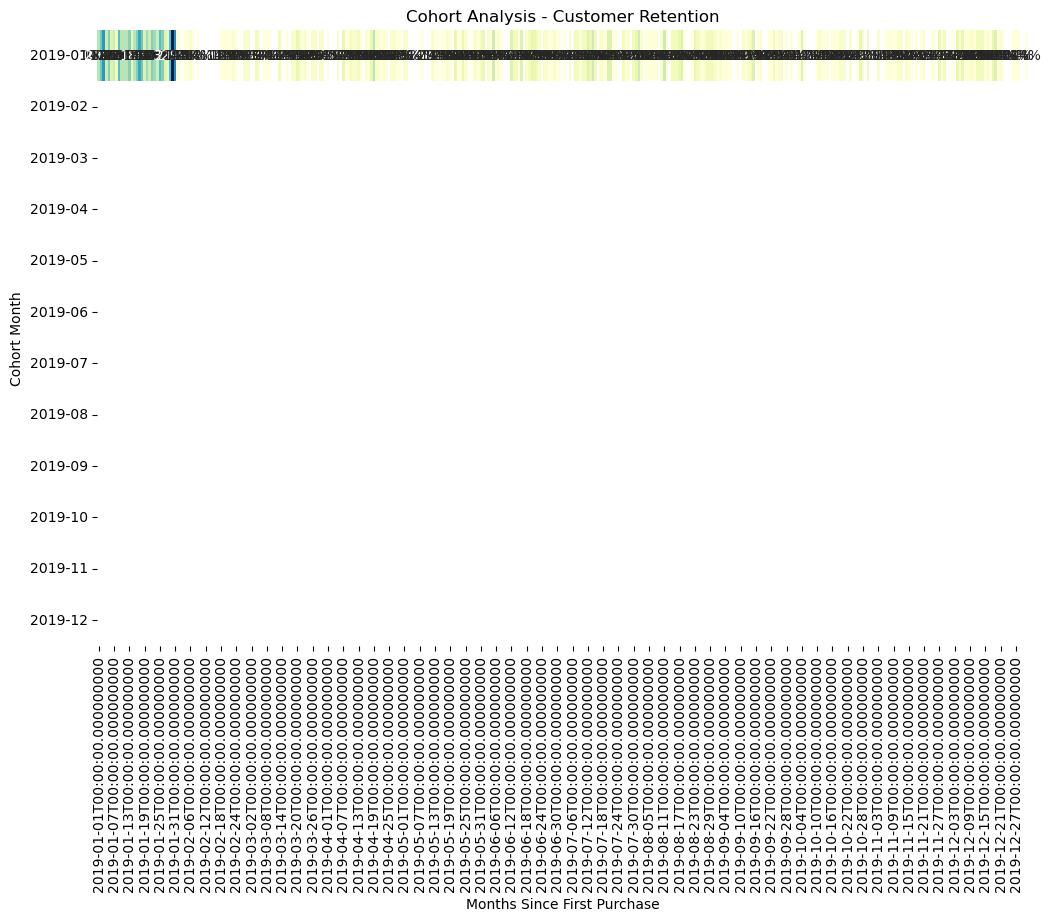

Cohort with Maximum Retention: First_Purchase_Month
2019-01   2019-01-30
2019-02          NaT
2019-03          NaT
2019-04          NaT
2019-05          NaT
2019-06          NaT
2019-07          NaT
2019-08          NaT
2019-09          NaT
2019-10          NaT
2019-11          NaT
2019-12          NaT
Freq: M, dtype: datetime64[ns]


In [299]:
# Visualize the cohort analysis results (heatmap)
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Customer Retention')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', cbar=False)
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

# Identify the cohort with the maximum retention
max_retention_cohort = retention.idxmax(axis=1)
print("Cohort with Maximum Retention:", max_retention_cohort)